In [18]:
# Web scraping a website to get the data
import pandas as pd

# Retrieve HTML table data
year = int(input("Enter year: "))
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

url = str.format(year)

df = pd.read_html(url, header=0)

df_year = df[0]

# Data cleaning
raw = df_year.drop(df_year[df_year.Age == 'Age'].index)
raw

Enter year: 2020


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [19]:
raw.shape

(651, 30)

In [20]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [21]:
# Check for missing values
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [22]:
# Replace missing values with 0
df = raw.fillna(0)

In [23]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [24]:
df = df.drop(['Rk'], axis=1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [25]:
df.to_csv('nba2020.csv', index=False)

In [26]:
! ls

Applications                      NBA Players' Data Analysis.ipynb
CS 231                            OneDrive - University of Waterloo
Crypto price notification.ipynb   Pictures
Desktop                           Public
Documents                         bitcoin_notifications.py.ipynb
Downloads                         crypto
Library                           nba2020.csv
Movies                            seaborn-data
Music


In [27]:
! cat nba2020.csv

Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,0,0.5,1.0,.500,.500,0.0,0.0,0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,.466,1.5,3.7,.404,1.6,2.9,.545,.580,1.0,1.2,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,.649,0.0,0.1,.000,4.3,6.6,.658,.649,2.4,3.9,.633,3.1,6.5,9.6,1.6,0.6,1.3,

In [28]:
df = pd.read_csv('nba2020.csv')

In [30]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [31]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [33]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,26,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,22,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,34,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,23,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,21,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,21,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,27,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,30,2,0,2.0,0.5,2.0,0.250,0.0,0.0,0.000,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,23,22,0,10.0,1.9,3.3,0.569,0.0,0.0,0.000,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [34]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Steven Adams,C,OKC
1,Bam Adebayo,PF,MIA
2,LaMarcus Aldridge,C,SAS
3,Kyle Alexander,C,MIA
4,Nickeil Alexander-Walker,SG,NOP
...,...,...,...
646,Trae Young,PG,ATL
647,Cody Zeller,C,CHO
648,Tyler Zeller,C,SAS
649,Ante Žižić,C,CLE


In [40]:
# Which player scored the most points per games?
PlayerMaxPoints = df[df.PTS==df.PTS.max()]
print(PlayerMaxPoints)

# Which team does he play for?
print(PlayerMaxPoints.Tm)

# Which position is the player playing as?
print(PlayerMaxPoints.Pos)

           Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...    FT%  \
258  James Harden  SG   30  HOU  68  68  36.5  9.9  22.3  0.444  ...  0.865   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
258  1.0  5.5  6.6  7.5  1.8  0.9  4.5  3.3  34.3  

[1 rows x 29 columns]
258    HOU
Name: Tm, dtype: object
258    SG
Name: Pos, dtype: object


In [41]:
# Which player(s) scored more than 20 points per game?
df[df.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
40,Bradley Beal,SG,26,WAS,57,57,36.0,10.4,22.9,0.455,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
43,Malik Beasley,SG,23,MIN,14,14,33.1,7.9,16.6,0.472,...,0.750,0.6,4.4,5.1,1.9,0.6,0.1,1.5,1.9,20.7
60,Bojan Bogdanović,SF,30,UTA,63,63,33.1,6.6,14.8,0.447,...,0.903,0.6,3.5,4.1,2.1,0.5,0.1,2.5,1.7,20.2
68,Devin Booker,SG,23,PHO,70,70,35.9,9.0,18.3,0.489,...,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
85,Jaylen Brown,SG,23,BOS,57,57,33.9,7.5,15.6,0.481,...,0.724,1.1,5.3,6.4,2.1,1.1,0.4,2.2,2.9,20.3
137,John Collins,PF,22,ATL,41,41,33.2,8.6,14.8,0.583,...,0.800,2.8,7.3,10.1,1.5,0.8,1.6,1.8,3.4,21.6
158,Stephen Curry,PG,31,GSW,5,5,27.8,6.6,16.4,0.402,...,1.000,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8
162,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,...,0.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1
169,DeMar DeRozan,SF,30,SAS,68,68,34.1,8.2,15.4,0.531,...,0.845,0.6,4.9,5.5,5.6,1.0,0.3,2.4,2.6,22.1


In [43]:
# Which player had highest assists per game?
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
320,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.493,...,0.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3


In [46]:
# groupby() function

# Which player scored the highest (PTS) in the Los Angeles Lakers?
LAL = df.groupby('Tm').get_group('LAL')
LAL[LAL.PTS == LAL.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
162,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,...,0.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1


In [59]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,134.0,7.647015,5.234511,0.0,4.125,6.35,9.625,26.5
C-PF,1.0,4.300000,NaN,4.3,4.300,4.30,4.300,4.3
PF,138.0,7.657971,6.182655,0.0,3.000,5.70,11.575,29.5
PF-C,5.0,7.860000,3.688902,2.4,6.700,8.40,9.400,12.4
PF-SF,3.0,4.700000,2.535744,1.8,3.800,5.80,6.150,6.5
PG,106.0,10.481132,7.377238,0.5,5.100,8.05,15.200,30.0
PG-SG,1.0,7.000000,NaN,7.0,7.000,7.00,7.000,7.0
SF,112.0,8.546429,6.026188,0.0,4.125,6.80,10.700,27.1
SF-C,1.0,3.600000,NaN,3.6,3.600,3.60,3.600,3.6


In [62]:
# Out of the 5 positions, which position scores the most points?
positions = ['C','PF','SF','PG','SG']
POS = df[df['Pos'].isin(positions)]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [63]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,134.0,7.647015,5.234511,0.0,4.125,6.35,9.625,26.5
PF,138.0,7.657971,6.182655,0.0,3.000,5.70,11.575,29.5
PG,106.0,10.481132,7.377238,0.5,5.100,8.05,15.200,30.0
SF,112.0,8.546429,6.026188,0.0,4.125,6.80,10.700,27.1
SG,142.0,8.549296,6.189476,0.0,3.825,7.45,11.975,34.3


In [65]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[PTS['Pos'].isin(positions)]

PTS

,Pos,PTS
0,C,10.9
1,PF,15.9
2,C,18.9
3,C,1.0
4,SG,5.7
...,...,...
646,PG,29.6
647,C,11.1
648,C,1.0
649,C,4.4


array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

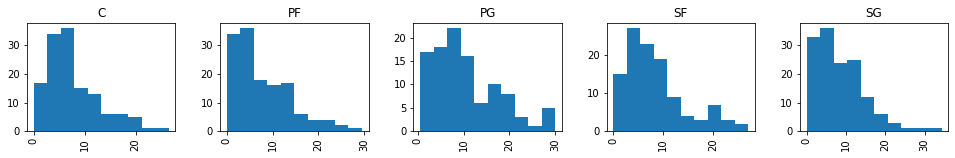

In [68]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))

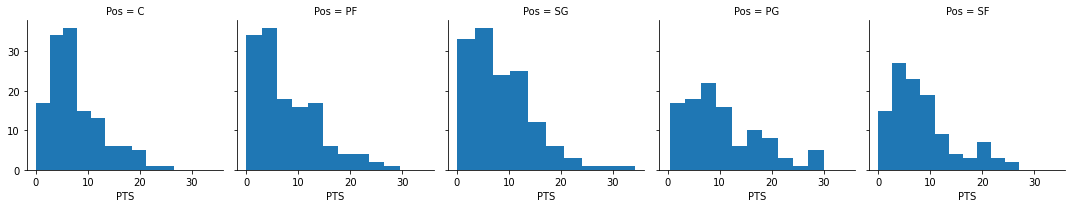

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col='Pos')
g.map(plt.hist, "PTS")

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

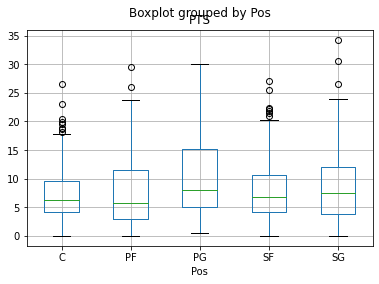

In [72]:
# Boxplot of points scored (PTS) grouped by position
PTS.boxplot(column='PTS', by='Pos')

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

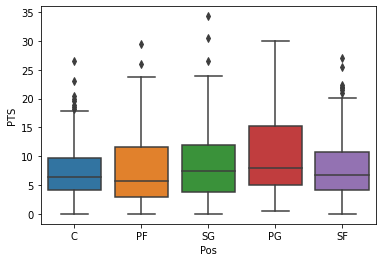

In [73]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS)

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

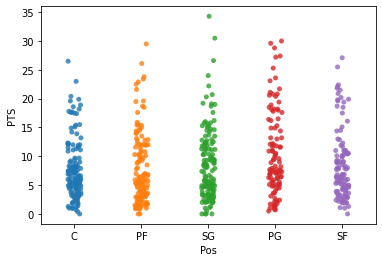

In [76]:
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
             jitter = True,
             marker = 'o',
             alpha = 0.8)

In [77]:
# Heat Map

# Compute the correlation matrix
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.112074,0.086981,0.187944,0.093014,0.111467,-0.012770,0.206767,0.203697,0.153164,...,0.092365,0.012826,0.145914,0.113539,0.157002,0.119281,0.056369,0.086540,0.120923,0.111290
G,0.112074,1.000000,0.634800,0.632346,0.520625,0.502973,0.241420,0.412623,0.392584,0.297786,...,0.350294,0.289908,0.458982,0.435172,0.397120,0.429177,0.269456,0.408157,0.437002,0.514799
GS,0.086981,0.634800,1.000000,0.769980,0.712433,0.697719,0.175034,0.488025,0.486009,0.189690,...,0.227115,0.390371,0.632457,0.596061,0.552719,0.549143,0.351951,0.618530,0.551070,0.706195
MP,0.187944,0.632346,0.769980,1.000000,0.880861,0.888803,0.201169,0.690791,0.700254,0.322447,...,0.390727,0.410920,0.733633,0.678810,0.688403,0.722303,0.397804,0.770935,0.737966,0.881214
FG,0.093014,0.520625,0.712433,0.880861,1.000000,0.975769,0.275202,0.660079,0.662039,0.283863,...,0.315092,0.431840,0.716891,0.672578,0.711258,0.617060,0.391933,0.844707,0.618267,0.988500
FGA,0.111467,0.502973,0.697719,0.888803,0.975769,1.000000,0.124488,0.750946,0.771815,0.308611,...,0.337838,0.302011,0.649347,0.582635,0.744636,0.627226,0.299843,0.849331,0.578788,0.982872
FG%,-0.012770,0.241420,0.175034,0.201169,0.275202,0.124488,1.000000,-0.067673,-0.141142,0.115910,...,0.110507,0.481782,0.329254,0.393503,0.058788,0.088195,0.375639,0.169142,0.333590,0.222546
3P,0.206767,0.412623,0.488025,0.690791,0.660079,0.750946,-0.067673,1.000000,0.976981,0.493476,...,0.349431,-0.135990,0.306417,0.192675,0.536755,0.443822,0.007820,0.540046,0.356086,0.723893
3PA,0.203697,0.392584,0.486009,0.700254,0.662039,0.771815,-0.141142,0.976981,1.000000,0.421138,...,0.342776,-0.143039,0.317364,0.198637,0.563553,0.464486,0.014133,0.571961,0.364801,0.728147
3P%,0.153164,0.297786,0.189690,0.322447,0.283863,0.308611,0.115910,0.493476,0.421138,1.000000,...,0.298185,-0.116740,0.100951,0.042843,0.229188,0.190777,-0.016531,0.188398,0.148462,0.305936


<AxesSubplot:>

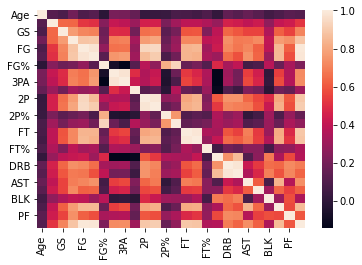

In [78]:
sns.heatmap(corr)

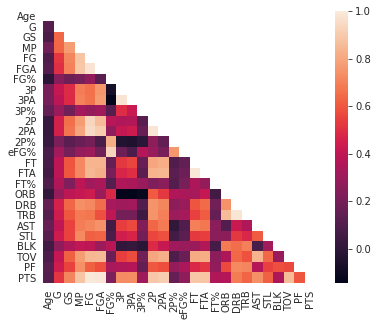

In [80]:
# Mask diagonal half of the heat map

import numpy as np

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [81]:
number = df.select_dtypes(include=['number'])

In [83]:
# Select first 5 columns
number.iloc[:,:5]

,Age,G,GS,MP,FG
0,26,63,63,26.7,4.5
1,22,72,72,33.6,6.1
2,34,53,53,33.1,7.4
3,23,2,0,6.5,0.5
4,21,47,1,12.6,2.1
...,...,...,...,...,...
646,21,60,60,35.3,9.1
647,27,58,39,23.1,4.3
648,30,2,0,2.0,0.5
649,23,22,0,10.0,1.9


In [84]:
selections = ['Age','G','STL','BLK','AST','PTS']
df5 = df[selections]
df5

,Age,G,STL,BLK,AST,PTS
0,26,63,0.8,1.1,2.3,10.9
1,22,72,1.1,1.3,5.1,15.9
2,34,53,0.7,1.6,2.4,18.9
3,23,2,0.0,0.0,0.0,1.0
4,21,47,0.4,0.2,1.9,5.7
...,...,...,...,...,...,...
646,21,60,1.1,0.1,9.3,29.6
647,27,58,0.7,0.4,1.5,11.1
648,30,2,0.0,0.0,0.0,1.0
649,23,22,0.3,0.2,0.3,4.4


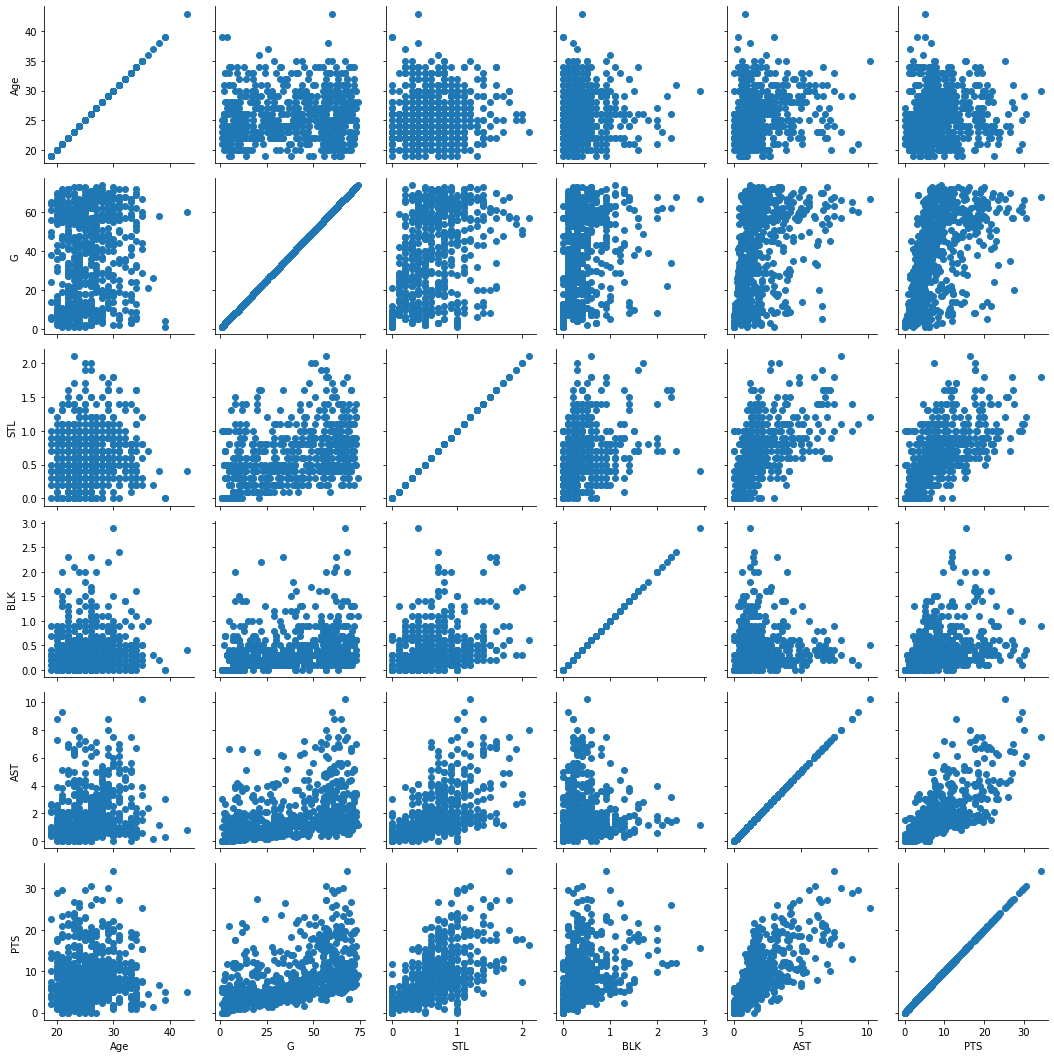

In [85]:
g1 = sns.PairGrid(df5)
g1.map(plt.scatter)

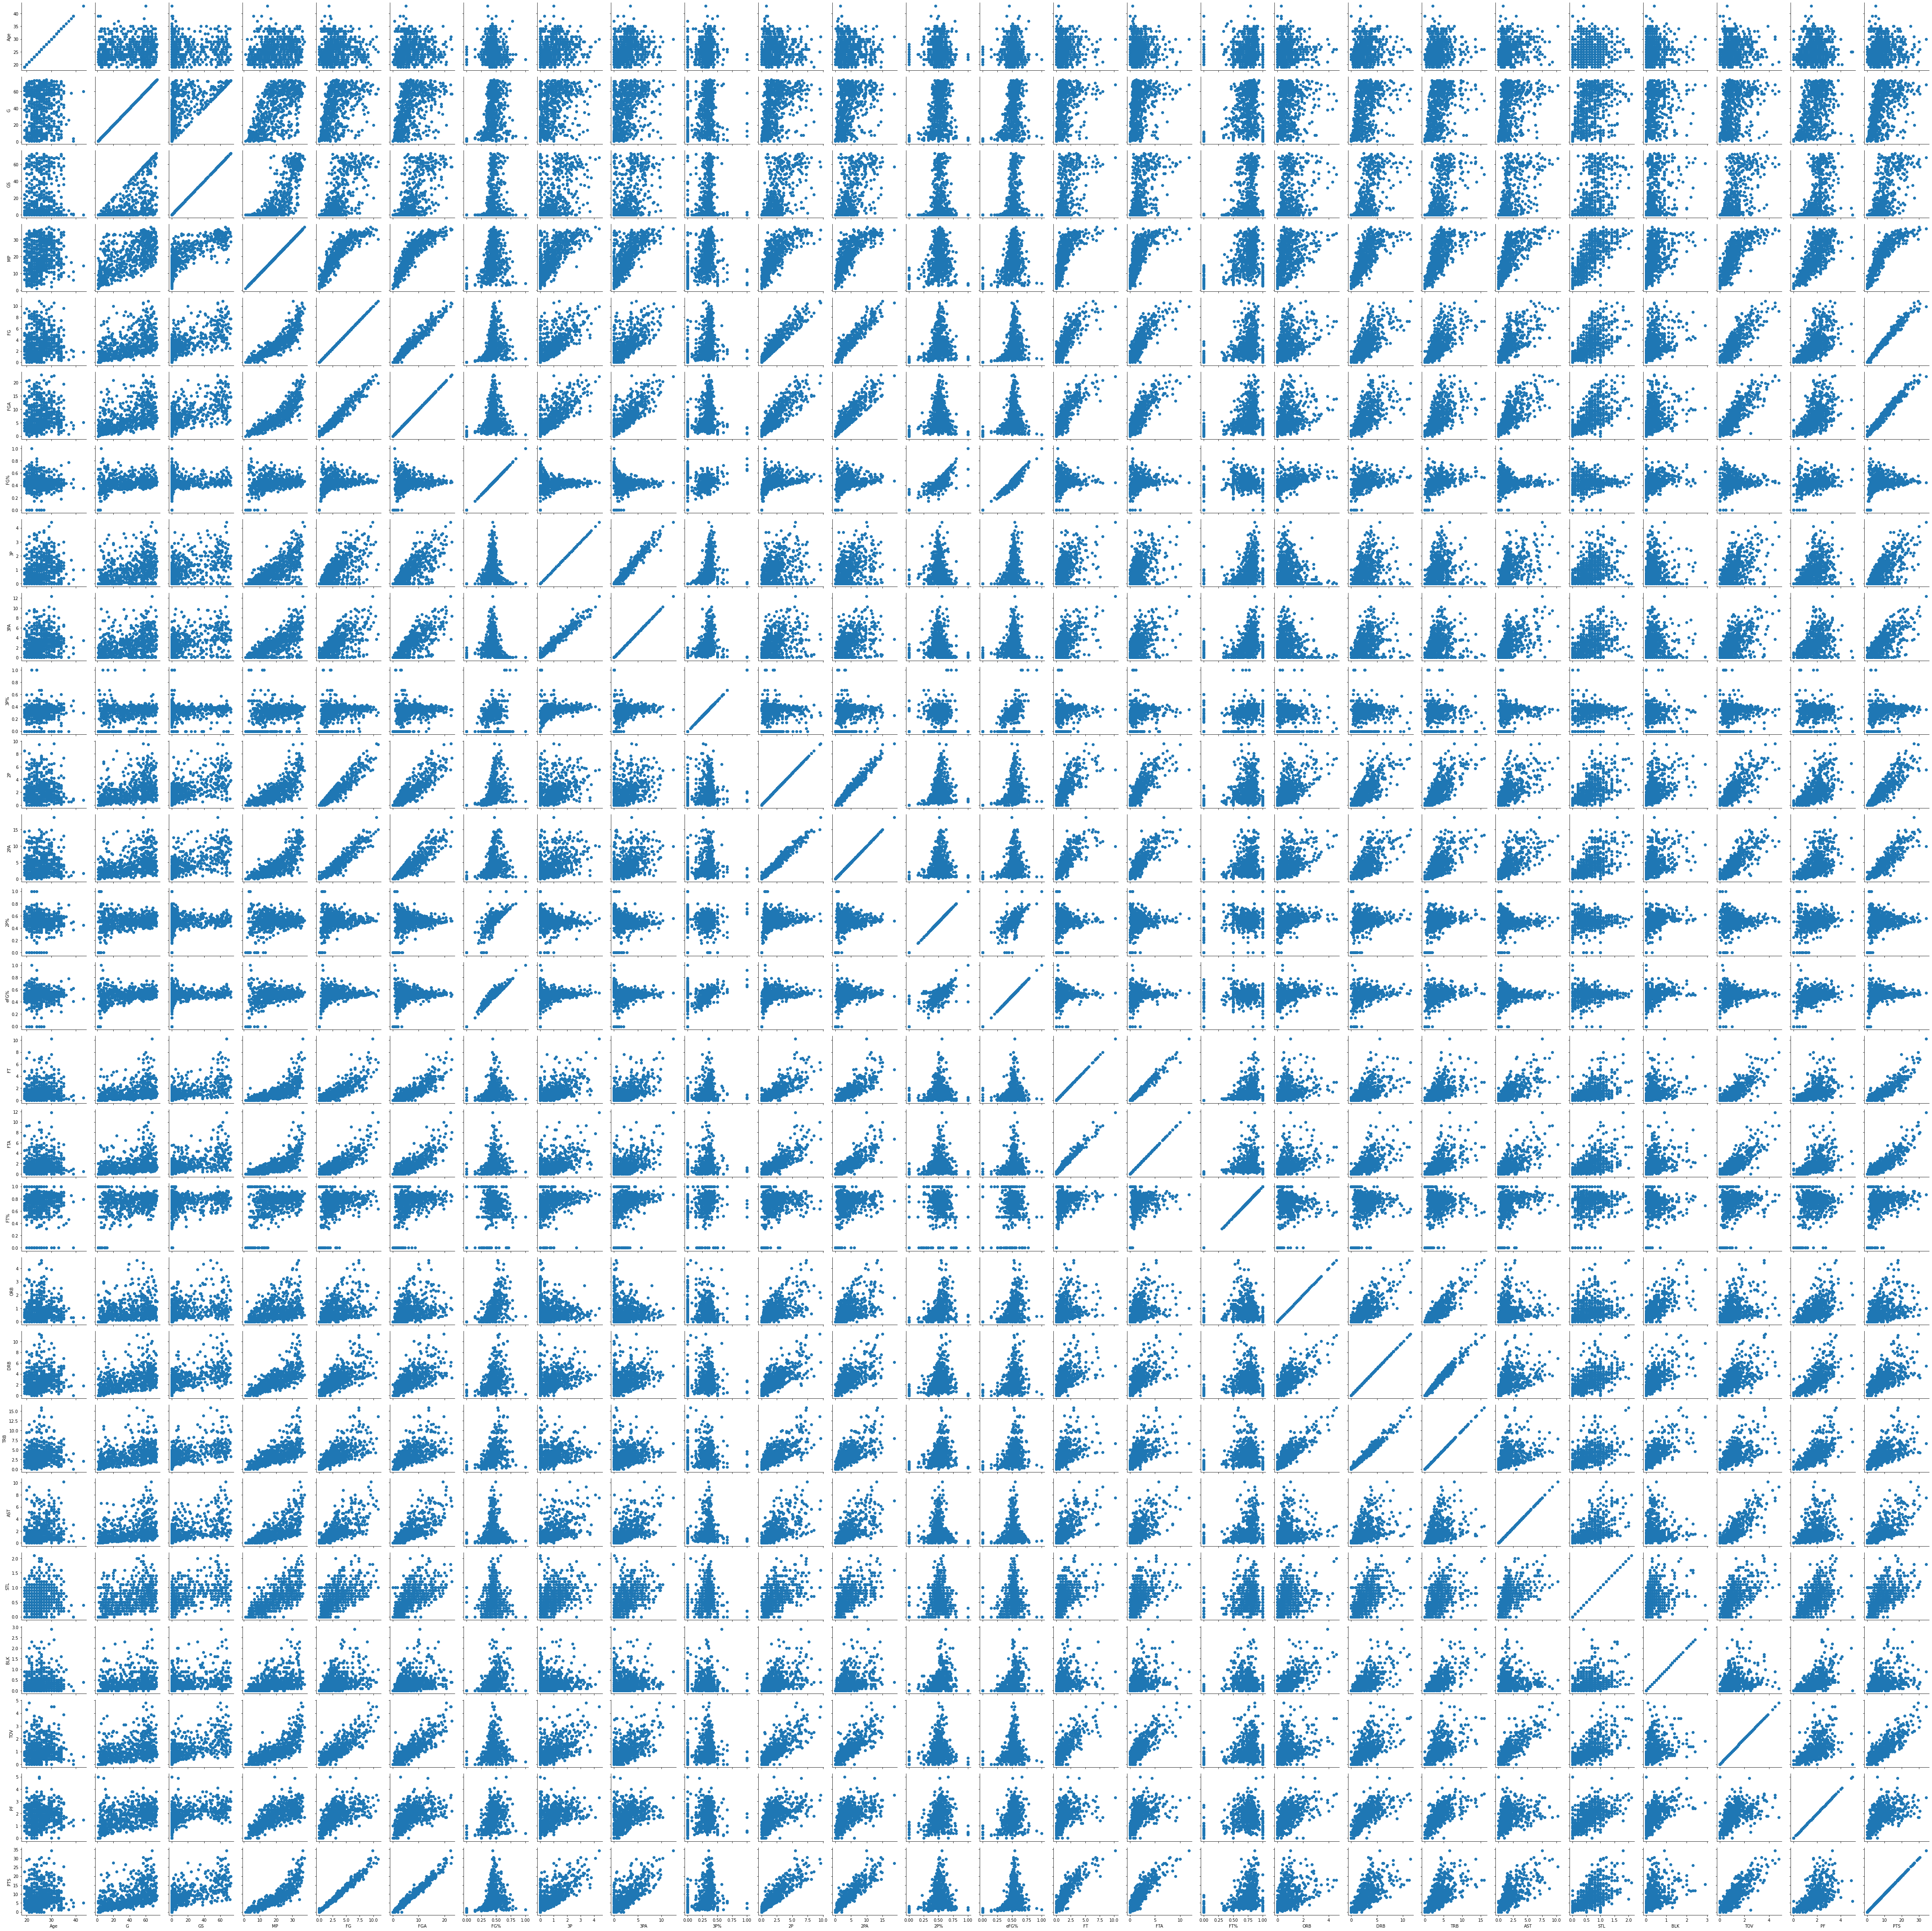

In [88]:
g2 = sns.PairGrid(number)
g2.map(plt.scatter)